# Premiere Partie : le modèle simple 

On cherche ici à réaliser le modèle le plus simple possible.

* On prend une population de n individus.
* Ces individus sont connectés les uns aux autres par des liens, en réseau, générés de façon aléatoire, selon diverses distributions.
* Parmi ces n individus, un pourcentage p est touché par une maladie.
* La probabilité d'être touché par cette malade est d'une probabilité $\lambda$
* Certains individus sont immunisés contre la maladie (par un vaccin), avec une probabilité $\mu$.
* La probabilité de guérir sans la vaccin est de $\eta$.
* On suppose que, quand on est vacciné, la probabilité de tomber malade est de 0.

Ces hypothèses seront par la suite assouplies

Le temps t sera défini par l'utilisateur

In [2]:
import networkx as nx
import math as math
import random as rd
import numpy as np
import scipy.stats as scstat
import matplotlib as plot
import matplotlib.pyplot as plt

In [3]:
# Création du graphe et demande des variables

G = nx.Graph()
n = int(input('Taille de la population : '))
p_init = float(input ('Pourcentage initial de personnes contaminées : '))
lmbda = float(input('Contagiosité de la maladie : '))
mu = float(input('Poucentage de personnes vaccinées initialement : ')) 
eta = float(input('Probabilité que la personne guérisse sans vaccin : '))

Taille de la population : 30
Pourcentage initial de personnes contaminées : 0.1
Contagiosité de la maladie : 0.4
Poucentage de personnes vaccinées initialement : 0.5
Probabilité que la personne guérisse sans vaccin : 0.2


In [4]:
print(n)

30


In [5]:
# Création de la liste des malades initiaux (1 si malade, 0 si sain)

Population = np.random.choice([0, 1], size=(n,), p=[1-p_init, p_init])

#Création de la liste des personnes vaccinées (1 tu es vacciné, 0 pas vacciné)  

Population2 = np.random.choice([0, 1], size=(n,), p=[1-mu, mu])
Population = np.concatenate((Population,Population2.T), axis = 0)
Population = np.reshape(Population, (2,n))

In [6]:
Tmalade = np.asarray(np.zeros((n,1))) #Création de la durée de temps malade pour une personne

for i in range(n):
    if Population[0][i] == 1:
        Tmalade[i] += 1
    elif Population[0][i] == 1:
        Tmalade[i] = 0
        
#NB : les personnes qui guérissent de la maladie sont considérées comme vaccinées 

In [7]:
# Création d'une base de données comportant le temps et la fréquence des gens malades dans la population

Frequence = []
Frequence.append((0,float(sum(Population[0])/n)))
print(Frequence)

[(0, 0.1)]


## Implémentation du réseau

Dans cette partie, nous mettons en place un réseau généré aléatoirement par une fonction gaussienne. Les paramètres pourront être modifiés par les utilisateurs du logiciel.


In [16]:
#Création du réseau d'individus

G.clear()

m = float(input ('Moyenne de la taille d un cluster : '))
p_intra = float(input ('Probabilité de créer des liens au sein des clusters : '))
p_inter = float(input('Probabilité de créer des liens entre les clusters : '))
v = float(input('Paramètre de taille (variance) : ')) 

G = nx.gaussian_random_partition_graph(n,m,v,p_intra,p_inter)

#Premier paramètre : nombre de noeuds
#Deuxième paramètre : la moyenne de la taille des clusters
#Troisième paramètre : paramètre de taille, la variance de la taille des clusters vaut : moyenne de la taille / ce paramètre
#Quatrième paramètre : La probabilité de créer des liens au sein des clusters
#Cinquième paramètre : La probabilité de créer des liens entre les clusters

Moyenne de la taille d un cluster : 10
Probabilité de créer des liens au sein des clusters : 0.5
Probabilité de créer des liens entre les clusters : 0.05
Paramètre de taille (variance) : 100


/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

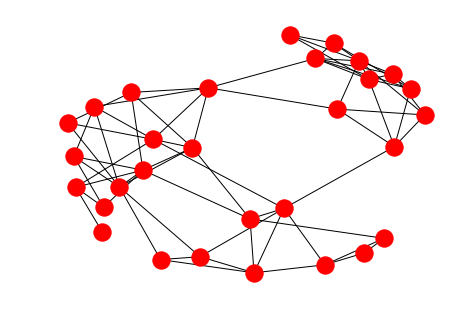

In [17]:
nx.draw(G)
plt.show()

In [20]:
def adjacency_matrix(G, nodelist=None, weight='weight'):
    """Return adjacency matrix of G.

    Parameters
    ----------
    G : graph
       A NetworkX graph

    nodelist : list, optional
       The rows and columns are ordered according to the nodes in nodelist.
       If nodelist is None, then the ordering is produced by G.nodes().

    weight : string or None, optional (default='weight')
       The edge data key used to provide each value in the matrix.
       If None, then each edge has weight 1.

    Returns
    -------
    A : SciPy sparse matrix
      Adjacency matrix representation of G.

    Notes
    -----
    If you want a pure Python adjacency matrix representation try
    networkx.convert.to_dict_of_dicts which will return a
    dictionary-of-dictionaries format that can be addressed as a
    sparse matrix.

    For MultiGraph/MultiDiGraph with parallel edges the weights are summed.
    See to_numpy_matrix for other options.

    The convention used for self-loop edges in graphs is to assign the
    diagonal matrix entry value to the edge weight attribute
    (or the number 1 if the edge has no weight attribute).  If the
    alternate convention of doubling the edge weight is desired the
    resulting Scipy sparse matrix can be modified as follows:

    >>> import scipy as sp
    >>> G = nx.Graph([(1,1)])
    >>> A = nx.adjacency_matrix(G)
    >>> print(A.todense())
    [[1]]
    >>> A.setdiag(A.diagonal()*2)
    >>> print(A.todense())
    [[2]]

    See Also
    --------
    to_numpy_matrix
    to_scipy_sparse_matrix
    to_dict_of_dicts
    """
    return nx.to_scipy_sparse_matrix(G,nodelist=nodelist,weight=weight)

adj_matrix=adjacency_matrix

# fixture for nose tests
def setup_module(module):
    from nose import SkipTest
    try:
        import scipy
    except:
        raise SkipTest("SciPy not available")

In [19]:
# Function to get the adjacency matrix on the form of a numpy matrix

def to_numpy_matrix(G, nodelist=None, dtype=None, order=None,
                    multigraph_weight=sum, weight='weight'):
    """Return the graph adjacency matrix as a NumPy matrix.

    Parameters
    ----------
    G : graph
        The NetworkX graph used to construct the NumPy matrix.

    nodelist : list, optional
       The rows and columns are ordered according to the nodes in `nodelist`.
       If `nodelist` is None, then the ordering is produced by G.nodes().

    dtype : NumPy data type, optional
        A valid single NumPy data type used to initialize the array. 
        This must be a simple type such as int or numpy.float64 and
        not a compound data type (see to_numpy_recarray)
        If None, then the NumPy default is used.

    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory. If None, then the NumPy default 
        is used.

    multigraph_weight : {sum, min, max}, optional
        An operator that determines how weights in multigraphs are handled.
        The default is to sum the weights of the multiple edges.

    weight : string or None   optional (default='weight')
        The edge attribute that holds the numerical value used for 
        the edge weight.  If None then all edge weights are 1.


    Returns
    -------
    M : NumPy matrix
       Graph adjacency matrix.

    See Also
    --------
    to_numpy_recarray, from_numpy_matrix

    Notes
    -----
    The matrix entries are assigned with weight edge attribute. When
    an edge does not have the weight attribute, the value of the entry is 1.
    For multiple edges, the values of the entries are the sums of the edge
    attributes for each edge.

    When `nodelist` does not contain every node in `G`, the matrix is built 
    from the subgraph of `G` that is induced by the nodes in `nodelist`.

    Examples
    --------
    >>> G = nx.MultiDiGraph()
    >>> G.add_edge(0,1,weight=2)
    >>> G.add_edge(1,0)
    >>> G.add_edge(2,2,weight=3)
    >>> G.add_edge(2,2)
    >>> nx.to_numpy_matrix(G, nodelist=[0,1,2])
    matrix([[ 0.,  2.,  0.],
            [ 1.,  0.,  0.],
            [ 0.,  0.,  4.]])
    """
    try:
        import numpy as np
    except ImportError:
        raise ImportError(\
          "to_numpy_matrix() requires numpy: http://scipy.org/ ")

    if nodelist is None:
        nodelist = G.nodes()

    nodeset = set(nodelist)
    if len(nodelist) != len(nodeset):
        msg = "Ambiguous ordering: `nodelist` contained duplicates."
        raise nx.NetworkXError(msg)

    nlen=len(nodelist)
    undirected = not G.is_directed()
    index=dict(zip(nodelist,range(nlen)))

    if G.is_multigraph():
        # Handle MultiGraphs and MultiDiGraphs
        # array of nan' to start with, any leftover nans will be converted to 0
        # nans are used so we can use sum, min, max for multigraphs
        M = np.zeros((nlen,nlen), dtype=dtype, order=order)+np.nan
        # use numpy nan-aware operations
        operator={sum:np.nansum, min:np.nanmin, max:np.nanmax}
        try:
            op=operator[multigraph_weight]
        except:
            raise ValueError('multigraph_weight must be sum, min, or max')

        for u,v,attrs in G.edges_iter(data=True):
            if (u in nodeset) and (v in nodeset):
                i,j = index[u],index[v]
                e_weight = attrs.get(weight, 1)
                M[i,j] = op([e_weight,M[i,j]]) 
                if undirected:
                    M[j,i] = M[i,j]
        # convert any nans to zeros
        M = np.asmatrix(np.nan_to_num(M))
    else:
        # Graph or DiGraph, this is much faster than above 
        M = np.zeros((nlen,nlen), dtype=dtype, order=order)
        for u,nbrdict in G.adjacency_iter():
            for v,d in nbrdict.items():
                try:
                    M[index[u],index[v]]=d.get(weight,1)
                except KeyError:
                    pass
        M = np.asmatrix(M)
    return M

In [20]:
M = to_numpy_matrix(G)
print(M)

[[ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]


## Début du processus dynamique 

In [26]:
#Demande du temps d'etude

t = int(input('Temps t : '))


# Première étape : vérification de la commande

#Transmission de la maladie
for l in range(t):
    for i in range(len(M)):
        for j in range (i,len(M)):
            if np.asarray(M)[i][j] == 1:
                if Population[0][i] == 1 & Population[0][j] == 0:
                    if Population[1][j] == 0:
                        Population[0][j] = int(np.random.binomial(1,lmbda))
                if Population[0][i] == 0 & Population[0][j] == 1:
                    if Population[1][i] == 0:
                        Population[0][i] = int(np.random.binomial(1,lmbda))
#Possibilité d'une guérison sans vaccin
        if Population[0][i] == 1 & int(Tmalade[i]) != 0:
            Population[0][i] = int(np.random.binomial(1,1-eta))
            if Population[0][i] == 0:
                Population[1][i] = 1 
#Mise à jour de la base de données sur la convalescence.        
    for i in range(n):
        if Population[0][i] == 1:
            Tmalade[i] += 1
        elif Population[0][i] == 0:
            Tmalade[i] = 0
#On ajoute les points pour mesurer la fréquence des gens malades
    Frequence.append((0,float(sum(Population[0])/n)))

Temps t : 20


Ce que l'on pourrait ajouter à long-terme :

* Créer un tableau de fréquence de la population touchée par la maladie : OK (à améliorer)
    *  Prendre en compte le nombre de personnes qui a été contaminées en tout (proportion des gens qui ont, un moment donné, été malade pendant l'épidémie. Meilleur indicateur pour comprendre l'étendue de l'épidémie. Tout le monde sera guéri à LT dans ce modèle. 

* Faire un réseau dynamique avec :
    * Les personnes meurent (à cause de la maladie)
        * Créer un paramètre de probabilité de décès du fait de la maladie
    * De nouveaux liens se créent ou se détruisent entre les personnes 
        * Des liens forts et des liens faibles (liens forts ne bougent pas, mais la probabilité de contamination reste pareille)
        * Mettre des probabilités différentes (liens fortes = probabilité plus forte de tomber malade).

* Modifier la formation du réseau

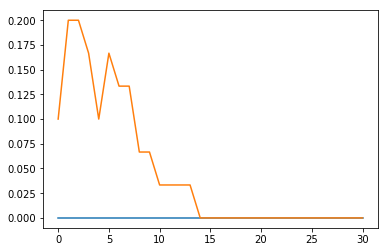

In [27]:
plt.plot(Frequence)
plt.show()

In [97]:
type(Tmalade[1])

numpy.ndarray

# Deuxième partie : un modèle plus complexe (dynamique) 